In [1]:
import numpy as np
import LU
import math
import sympy as sp
from matplotlib import style
style.use('seaborn-notebook')

### 1) Escreva um programa que faça a integração numérica de uma função f(x) no intervalo [a,b] que permita o uso (escolha pelo usuário) da integração polinomial ou a Quadratura de Gauss. O programa deve permitir que o usuário escolha o número de pontos de integração, que deve ser entre 1 e 10.

- 1o passo: definir as funcoes de integracao polinomial e quadratura de Gauss:

In [2]:
def polinomial(formula,intervalo_integracao,pontos_de_integracao):
    '''N pontos de integracao: Integra corretamente um polinomio de ordem N-1'''
    N = pontos_de_integracao
    a,b = map(float,intervalo_integracao)
    
    #Inicializando o vetor de pontos X que serao utilizados
    if N == 1: #Mid point
        X_pontos = np.array([(a+b)/2],float)
    elif N == 2: #Trapezio
        X_pontos = np.array([a,b],float)
    else:
        delta = (b-a)/(N-1)
        X_pontos = np.array([a+j*delta for j in range(N)])
        
        
    #Inicializando matriz de Vandermonde e matriz_b para descobrir o peso atraves de um sistema linear
    vander = np.eye(N)
    matriz_b = np.array([[0] for z in range(N)],float)

    for i in range(N):
        matriz_b[i] = (b**(i+1)-a**(i+1))/(i+1) 

        for j in range(N):
            vander[i,j] = X_pontos[j]**i
    _,_,pesos = LU.fact_lu(vander,matriz_b)
    
    integral = sum(formula(x)*w for x,w in zip(X_pontos,pesos))
    return float(integral)
    
    
    

Quadratura de Gauss:

In [3]:
pesos_gauss = {
    2 : [np.array([1.0, 1.0]),
      np.array([-0.5773502691896257, 0.5773502691896257])],
    3 : [np.array([0.8888888888888888, 0.5555555555555556, 0.5555555555555556]),
         np.array([0.0, -0.7745966692414834, 0.7745966692414834])],
    4 : [np.array([0.6521451548625461, 0.6521451548625461,
                      0.3478548451374538, 0.3478548451374538]),
        np.array([-0.3399810435848563, 0.3399810435848563,
                      -.8611363115940526, 0.8611363115940526])],
    5: [np.array([0.5688888888888889, 0.4786286704993665,
                      0.4786286704993665, 0.2369268850561891, 0.2369268850561891]),
       np.array([0.0, -0.5384693101056831, 0.5384693101056831,
                      -0.9061798459386640, 0.9061798459386640])],
    6: [np.array([0.3607615730481386, 0.3607615730481386, 0.4679139345726910,
                      0.4679139345726910, 0.1713244923791704, 0.1713244923791704]),
       np.array([0.6612093864662645, -0.6612093864662645, -0.2386191860831969,
                      0.2386191860831969, -0.9324695142031521, 0.9324695142031521])],
    7: [np.array([0.4179591836734694, 0.3818300505051189, 0.3818300505051189,
                      0.2797053914892766, 0.2797053914892766, 0.1294849661688697, 0.1294849661688697]),
       np.array([0.0, 0.4058451513773972, -0.4058451513773972, -0.7415311855993945,
                      0.7415311855993945, -0.9491079123427585, 0.9491079123427585])],
    8: [np.array([0.3626837833783620, 0.3626837833783620, 0.3137066458778873, 0.3137066458778873,
                      0.2223810344533745, 0.2223810344533745, 0.1012285362903763, 0.1012285362903763]),
       np.array([-0.1834346424956498, 0.1834346424956498, -0.5255324099163290, 0.5255324099163290,
                      -0.7966664774136267, 0.7966664774136267, -0.9602898564975363, 0.9602898564975363])],
    9: [np.array([0.3302393550012598, 0.1806481606948574, 0.1806481606948574, 0.0812743883615744,
                0.0812743883615744, 0.3123470770400029, 0.3123470770400029, 0.2606106964029354, 0.2606106964029354]),
       np.array([0.0, -0.8360311073266358, 0.8360311073266358, -0.9681602395076261, 0.9681602395076261,
                      -0.3242534234038089, 0.3242534234038089, -0.6133714327005904, 0.6133714327005904])],
    10:[np.array([0.2955242247147529, 0.2955242247147529, 0.2692667193099963, 0.2692667193099963, 0.2190863625159820,
                      0.2190863625159820, 0.1494513491505806, 0.1494513491505806, 0.0666713443086881, 0.0666713443086881]),
        np.array([-0.1488743389816312, 0.1488743389816312, -0.4333953941292472, 0.4333953941292472, -0.6794095682990244,
                      0.6794095682990244, -0.8650633666889845, 0.8650633666889845, -0.9739065285171717, 0.9739065285171717])]
}


def quadratura_gauss(formula,intervalo_integracao,pontos_de_integracao):
    '''N pontos de integracao: Integra corretamente um polinomio de ordem 2*N-1'''
    a,b = map(float,intervalo_integracao)
    N = pontos_de_integracao
    L = b-a
    if N == 1:
        #Mid-point!
        integral = formula((b+a)/2.0)*L
        return integral
    peso,abscissa = pesos_gauss[N]
    x_z = lambda z: (a+b+z*L)/2.0 # Isso define x em funcao de z para obter g(z)
    integral = L/2.0*sum(formula(x_z(z))*w for z,w in zip(abscissa,peso))
    return integral
    

In [4]:
def integral(formula,intervalo_integracao,pontos_de_integracao,metodo='gauss'):
    '''Calcula o valor da integral de uma funcao a partir do intervalo
    de integracao e pontos de integracao.
        Inputs:
            formula: python function. ex: lambda x:x**2
            intervalo_integracao: lista ou tupla. ex: [0,10]
            pontos de integracao: int
            metodo: "polinomial" ou "quadratura". Default: quadratura.
            
        Metodo polinomial consegue integrar corretamente um polinomio de ordem
            n-1. n = numero de pontos de integracao.
            
        Metodo quadratura consegue integrar corretamente um polinomio de ordem 2*n-1.
        '''
    if metodo == 'polinomial':
        return polinomial(formula,intervalo_integracao,pontos_de_integracao)
    else:
        return quadratura_gauss(formula,intervalo_integracao,pontos_de_integracao)

### 2) Use o programa desenvolvido para obter o resultado numérico das seguintes integrais:

#### &emsp;&emsp;&emsp;&emsp;I1:
$$\int_{0}^{1}\frac{1}{\sqrt{2\pi}}exp(-\frac{1}{2}x^2)dx$$

In [5]:
l1 = lambda x:1/math.sqrt(2*math.pi)*math.exp(-1/2*x**2)

Metodo Polinomial:

In [6]:
integral(l1,[0,1],3,metodo='polinomial')

0.3415290519962957

Metodo Quadratura de Gauss:

In [7]:
integral(l1,[0,1],2,metodo='gauss')

0.3412211416986809

#### &emsp;&emsp;&emsp;&emsp;I2:
$$\int_{0}^{5}\frac{1}{\sqrt{2\pi}}exp(-\frac{1}{2}x^2)dx$$<br><br>
l2 corresponde a funcao de l1 porem com limites de integracao diferentes. Logo, para evitar repeticao de codigo, usarei a definicao da funcao de l1

**Metodo Polinomial:**

In [8]:
integral(l1,[0,5],6,metodo='polinomial')

0.49755058901774807

**Metodo Quadratura de Gauss:**

In [9]:
integral(l1,[0,5],5,metodo='gauss')

0.5004474475195483

### 3) Usando o seu programa e considerando $S_\sigma(\omega)=RAO(\omega)^2S_\eta(\omega)$ onde <br> <br><br>$$RAO(\omega)=\frac{1}{\sqrt{(1-(\frac{\omega}{\omega_n})^2)^2+(2\xi\frac{\omega}{\omega_n})^2}}$$<br><br> com $\omega_n=1.0$ e $\xi=0.05$ e $S_\eta(\omega)=2.0$, obtenha $m_0$ e $m_2$ dados por:<br><br><br>$m_0=\int_{0}^{10}S_\sigma(\omega)d\omega$<br><br><br>$m_2=\int_{0}^{10}\omega^2S_\sigma(\omega)d\omega$


In [10]:
RAO = lambda w: 1/math.sqrt((1-(w/1.0)**2)**2+(2*0.05*w/1.0)**2)
S = lambda w: RAO(w)**2*2.0

#### $m_0$:

Plotando a funcao para ver seu comportamento no intervalo [0,10]:

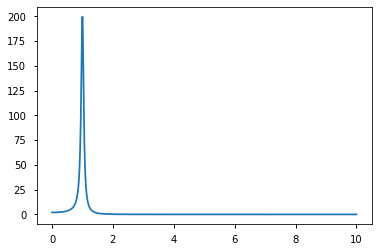

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
X = np.linspace(0,10,1000)
Vetorizacao_S = np.vectorize(S)
plt.plot(X,Vetorizacao_S(X))


Fazendo a integral indefinida analiticamente obtem-se uma expressao com numeros complexos. Ao definir um limite [0,10], obtem-se o resultado 31.4153. 

<a href="https://www.wolframalpha.com/input/?i=%E2%88%AB2*%281%2F%E2%88%9A%28%281-w**2%29**2%2B%282*0.05*w%2F1.0%29**2%29%29**2dw+from+0+to+10">Solucao Analitica!</a>

**Metodo polinomial onde N = numero de pontos de integracao:**

In [12]:
for n in range(1,11):
    print(f'N = {n}: {integral(S,[0,10],n,metodo="polinomial")}')

N = 1: 0.03470715835140998
N = 2: 10.001020199959193
N = 3: 3.3568115055540027
N = 4: 2.577508854893364
N = 5: 1.820086786708735
N = 6: 1.9152889307432974
N = 7: 2.608302882258963
N = 8: 4.6664485068228965
N = 9: 13.227748281908857
N = 10: 52.85924970138235


**Metodo de Quadratura de Gauss**:

In [13]:
for n in range(1,11):
    print(f'N = {n}: {integral(S,[0,10],n,metodo="gauss")}')


N = 1: 0.03470715835140998
N = 2: 0.8320929927115737
N = 3: 64.84830061104871
N = 4: 12.809405305456076
N = 5: 4.147474355832165
N = 6: 3.233216865682075
N = 7: 7.555794033919728
N = 8: 195.21080209592125
N = 9: 17.05580203189161
N = 10: 6.598559615255326


**Analise:**

Para ambos os algoritmos, o valor da integral muda significativamente dependendo do numero de pontos de integracao. Como essas tecnicas foram desenvolvidas com base para integrar funcoes polinomiais, para essa funcao, nao da para saber exatamente quantos pontos de integracao sao necessarios. Definitivamente nao sao 10. 

#### $m_2$:

In [14]:
m2 = lambda w:w**2*S(w)

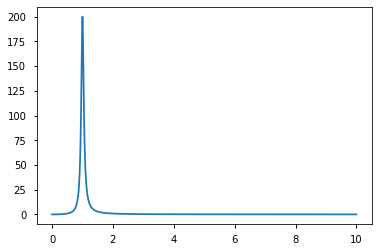

In [15]:
Vetorizacao_m2 = np.vectorize(m2)
plt.plot(X,Vetorizacao_m2(X))

**Polinomial:**

In [16]:
for n in range(1,11):
    print(f'N = {n}: {integral(m2,[0,10],n,metodo="polinomial")}')

N = 1: 0.8676789587852496
N = 2: 0.10201999591920015
N = 3: 0.6124593044965665
N = 4: 1.016305388474979
N = 5: 1.8714222786921193
N = 6: 2.7507528734524858
N = 7: 4.932781274677633
N = 8: 8.319639858133103
N = 9: 20.120283032031445
N = 10: 65.2099810484252


**Gauss:**

In [17]:
for n in range(1,11):
    print(f'N = {n}: {integral(m2,[0,10],n,metodo="gauss")}')

N = 1: 0.8676789587852496
N = 2: 3.8700950795315676
N = 3: 82.80539866973832
N = 4: 7.059435520204341
N = 5: 2.5696978971748283
N = 6: 3.75969560675518
N = 7: 10.987739286122974
N = 8: 201.78399833694257
N = 9: 12.564682282723105
N = 10: 5.35698500920671


Tambem nao e possivel alcancar a convergencia com apenas 10 pontos!

### 4) Repita o exercício anterior considerando um novo $S_{\eta}(\omega)$

$$S_{\eta}(\omega)=\frac{4\pi^3Hs^2}{\omega^5Tz^4}exp(-\frac{16\pi^3}{\omega^4Tz^4})$$<br><br> com $Hs=3.0$ e $Tz=5.0$

In [60]:
from math import pi,exp,sqrt
Sn_ex4 = lambda w: ((4*pi**3*3.0**2/(w**5*5.0**4))*
                    exp(-(16*pi**3)/(w**4*5.0**4)))

**$m_0$:**

In [61]:
S_ex4 = lambda w: RAO(w)**2*Sn_ex4(w)

Plotando para observar o comportamento:

**OBS**: Como 0 corresponde ao limite inferior de integracao, ocorre divisao por 0 no metodo polinomial o que dificulta tanto a plotagem como a verificacao do codigo. Para contornar esse problema, foi definido um novo limite inferior de valor bem proximo de 0. Novo limite = $1.10^{-14}$ tanto para $m_0$ quanto para $m_2$ para o caso polinomial. Como nao ha coordenada $x=0$ na tabela de Gauss-Legendre, foi mantido o limite inferior = 0 para este metodo.

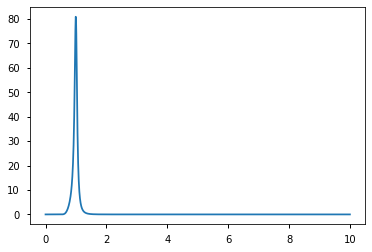

In [19]:
Vetorizacao_S_ex4 = np.vectorize(S_ex4)
X_ex4 = np.linspace(1.0e-14,10,1000)
plt.plot(X_ex4,Vetorizacao_S_ex4(X_ex4))


Polinomial:

In [20]:
for n in range(1,11):
    print(f'N = {n}: {integral(S_ex4,[1.0e-14,10],n,metodo="polinomial")}')

N = 1: 9.90511632006554e-06
N = 2: 9.10946633241415e-09
N = 3: 6.606447368821172e-06
N = 4: 0.00015826820384941173
N = 5: 0.002307903342765595
N = 6: 0.015313263709338198
N = 7: 0.10107487590669127
N = 8: 0.46542646905115487
N = 9: 2.644426976298791
N = 10: 16.337707699478003


Gauss-Legendre:

In [21]:
for n in range(1,11):
    print(f'N = {n}: {integral(S_ex4,[0,10],n,metodo="gauss")}')

N = 1: 9.905116320065648e-06
N = 2: 0.016888162997259076
N = 3: 19.467277817509128
N = 4: 2.316734483073126
N = 5: 0.003399575333912638
N = 6: 0.05955365220462492
N = 7: 1.1193237326149836
N = 8: 75.85330094257573
N = 9: 6.591566942728261
N = 10: 0.7532902132971433


#### m2:

In [22]:
m2_ex4 = lambda w:w**2*S_ex4(w)

Polinomial:

In [23]:
for n in range(1,11):
    print(f'N = {n}: {integral(m2_ex4,[1.0e-14,10],n,metodo="polinomial")}')

N = 1: 0.000247627908001639
N = 2: 9.10946633241415e-07
N = 3: 0.00016538892087883996
N = 4: 0.001767714243754611
N = 5: 0.014453672695603305
N = 6: 0.061426598513157946
N = 7: 0.2809503477651456
N = 8: 0.9508287398402089
N = 9: 4.131553159381341
N = 10: 20.171872882750993


Gauss-Legendre:

In [24]:
for n in range(1,11):
    print(f'N = {n}: {integral(m2_ex4,[0,10],n,metodo="gauss")}')

N = 1: 0.0002476279080016412
N = 2: 0.07542400330340233
N = 3: 24.72679048966965
N = 4: 1.1184281672518546
N = 5: 0.018102641113009077
N = 6: 0.1712329670394387
N = 7: 1.8711970931384
N = 8: 78.41093590426087
N = 9: 4.464310594729089
N = 10: 0.48426836843985044


### 5) Com o programa desenvolvido, use o número mínimo de pontos de integração para integrar exatamente a integral abaixo pelos métodos da Integração Polinomial e da Quadratura de Gauss.

$$f(x)=2+2x-x^2+3x^3$$
<br>
$$A=\int_{0}^{4}f(x)dx$$

In [25]:
funcao_ex5 = lambda x:2+2*x-x**2+3*x**3


- Metodo Polinomial

Tendo N o numero de pontos de integracao, para integrar corretamente uma funcao atraves da Integracao Polinomial, torna-se necessario que $N-1 \geq o$, sendo $o$ a ordem do polinomio. Nesse caso, o numero minimo de pontos de integracao e 4, uma vez que esta funcao e um polinomio de ordem 3


In [26]:
integral(funcao_ex5,[0,4],4,metodo='polinomial')

194.66666666666666

- Metodo Gauss-Legendre

Usando a tecnica da Quadratura de Gauss, N pontos de integracao integram corretamente um polinomio de ordem $2N-1$. Logo, como a ordem do polinomio e 3, $2N-1\geq3$. Minimo $N = 2$

In [27]:
integral(funcao_ex5,[0,4],2,metodo='gauss')

194.66666666666666

### 6) Use os valores da regra do Ponto médio e do Trapézio para estimar um valor mais aproximado para a integral abaixo. Obtenha também, a partir destes dois valores, qual seria o valor da integral caso tivesse sido usada a Regra de Simpson. Resolva numericamente esta integral com o programa desenvolvido e compare os valores obtidos.

$$A=\int_{0}^{3}\frac{1}{1+x^2}dx$$

In [28]:
func_ex6 = lambda x: 1/(1+x**2)

Tendo os limites [0,3]

Pela Regra do Mid-point:

In [29]:
M = func_ex6((3.0+0)/2.0)*(3-0)
M

0.9230769230769231

Pela Regra do Trapezio:

In [30]:
T = (func_ex6(0)+func_ex6(3))/2.0*(3-0)
T

1.6500000000000001

Obtendo o valor da Regra de Simpson por M e T:

In [31]:
Simpson = 2/3*M + 1/3*T
Simpson

1.1653846153846155

Obtendo a estimativa de erro:

In [32]:
Erro = (T - M)/3.0
Erro

0.24230769230769234

Reavaliando o valor da integral considerando o Erro:

In [33]:
A = M + Erro
A

1.1653846153846155

Utilizando a Quadratura de Gauss para obter a integral e fazer a comparacao:

In [34]:
integral(func_ex6,[0,3],7)

1.2490605128576824

Analiticamente, a integral indefinida e dada por arctg(x)

In [62]:
integral_definida = math.atan(3) - math.atan(0)
integral_definida

1.2490457723982544

Nota-se que o valor obtido pela Quadratura de Gauss e bem proximo da solucao analitica, enquanto que, utilizando Mid-Point e Trapezio, o valor so se aproxima da solucao analitica quando considerado o erro.

Criando um programa geral para analise de erro e estrategias de mid-point, trapezio e Simpson:

In [67]:
def estimativa(funcao,limites):
    a,b = limites
    M = funcao((a+b)/2.0)*(b-a)
    T = (funcao(a) + funcao(b))/2.0*(b-a)
    Simpson = 2/3*M+1/3*T
    Err = (T-M)/3.0
    print(f'Ponto medio: {M}\nTrapezio: {T}\nSimpson: {Simpson}')
    print(f'Considerando erro para midpoint e trapezio: {M+Err}')

In [68]:
estimativa(func_ex6,[0,3])

Ponto medio: 0.9230769230769231
Trapezio: 1.6500000000000001
Simpson: 1.1653846153846155
Considerando erro para midpoint e trapezio: 1.1653846153846155


### 7) Pesquise sobre a técnica de Gauss-Hermite e desenvolve uma rotina para resolver as seguintes integrais:

$$A_1=\int_{-\infty}^{1}\frac{1}{\sqrt{2\pi}}exp(-\frac{1}{2}x^2)dx$$<br>
$$A_2=\int_{-\infty}^{\infty}\frac{x^2}{\sqrt{2\pi}}exp(-\frac{1}{2}x^2)dx$$<br>

In [36]:
pesos_hermite = {
    1:[np.array([0],float),
      np.array([1.7724538509055160272981674833411])],
    
    2:[np.array([-0.7071067811865475244008,0.7071067811865475244008]),
      np.array([0.8862269254527580136491,0.886226925452758013649])],
    
    3:[np.array([-1.224744871391589049099,0.0,
                1.224744871391589049099]),
      np.array([0.295408975150919337883,1.181635900603677351532,
                0.295408975150919337883])],
    
    4:[np.array([-1.650680123885784555883,-0.5246476232752903178841,
                 0.5246476232752903178841,1.650680123885784555883]),
      np.array([0.081312835447245177143,0.8049140900055128365061,
                0.8049140900055128365061,0.08131283544724517714303])],
    
    5:[np.array([-2.020182870456085632929,-0.9585724646138185071128,
            0.0,0.9585724646138185071128,2.020182870456085632929]),
      np.array([0.01995324205904591320774,0.3936193231522411598285,
                0.9453087204829418812257,0.393619323152241159828,
                0.01995324205904591320774])],
    
    6:[np.array([-2.350604973674492222834,-1.335849074013696949715,
            -0.4360774119276165086792,0.436077411927616508679,
            1.335849074013696949715,2.350604973674492222834]),
      np.array([0.004530009905508845640857,0.1570673203228566439163,
            0.7246295952243925240919,0.724629595224392524092,
            0.1570673203228566439163,0.004530009905508845640857])],
    
    7:[np.array([-2.651961356835233492447,-1.673551628767471445032,
            -0.8162878828589646630387,0.0,0.8162878828589646630387,
            1.673551628767471445032,2.651961356835233492447]),
      np.array([9.71781245099519154149e-4,0.05451558281912703059218,
        0.4256072526101278005203,0.810264617556807326765,
        0.4256072526101278005203,0.0545155828191270305922,
        9.71781245099519154149e-4])],
    
    8:[np.array([-2.930637420257244019224,-1.981656756695842925855,
        -1.157193712446780194721,-0.3811869902073221168547,
        0.3811869902073221168547,1.157193712446780194721,
        1.981656756695842925855,2.930637420257244019224]),
      np.array([1.99604072211367619206e-4,0.0170779830074134754562,
        0.2078023258148918795433,0.6611470125582412910304,
        0.6611470125582412910304,0.2078023258148918795433,
        0.0170779830074134754562,1.996040722113676192061e-4])],
    
    9:[np.array([-3.19099320178152760723,-2.266580584531843111802,
        -1.468553289216667931667,-0.7235510187528375733226,
        0.0,0.7235510187528375733226,1.468553289216667931667,
        2.266580584531843111802,3.19099320178152760723]),
      np.array([3.960697726326438190459e-5,0.00494362427553694721722,
        0.088474527394376573288,0.4326515590025557501998,
        0.7202352156060509571243,0.4326515590025557502,
        0.088474527394376573288,0.004943624275536947217225,
        3.96069772632643819046e-5])],
    
    10:[np.array([-3.436159118837737603327,-2.532731674232789796409,
        -1.756683649299881773451,-1.036610829789513654178,
        -0.3429013272237046087892,0.3429013272237046087892,
        1.036610829789513654178,1.756683649299881773451,
        2.532731674232789796409,3.436159118837737603327]),
      np.array([7.64043285523262062916e-6,0.001343645746781232692202,
        0.0338743944554810631362,0.2401386110823146864165,
        0.6108626337353257987836,0.6108626337353257987836,
        0.2401386110823146864165,0.03387439445548106313616,
        0.001343645746781232692202,7.64043285523262062916e-6])]
}

def hermitao(formula,pontos_integracao):
    N = pontos_integracao
    X,w = pesos_hermite[N]
    integral = sum(formula(x)*peso for x,peso in zip(X,w))
    return integral

#### A1:

Fazendo substituicao $u^2 = \frac{1}2x^2$. Tem-se que $dx = \frac{2}{\sqrt{2}}du$ e os novos limites de integracao sao [$-\infty$,$\frac{1}{\sqrt{2}}$]

$$\int_{-\infty}^{\sqrt{2}^{-1}}\frac{1}{\sqrt{2\pi}}exp(-u^2)\frac{2}{\sqrt{2}}du$$

Finalmente e possivel utilizar gauss-hermite!

In [37]:
func_a1 = lambda u : 1/sqrt(2*pi)*2/sqrt(2)*exp(-u**2)

In [38]:
func_hermite_a1 = lambda u: 1/sqrt(2*pi)*2/sqrt(2)

In [39]:
hermitao(func_hermite_a1,8)

0.9999999999999999

O valor **$\approx 1$** refere-se a integral de $-\infty$ ate $\infty$. Tendo que a funcao e par, consegue-se obter a integral de $-\infty$ ate 0 apenas dividindo **1** por 2. A segunda parte da integral pode ser calculada atraves de uma quadratura de gauss-legendre, tendo o limite de 0 a $\frac{1}{\sqrt{2}}$

In [40]:
parte_1_hermitao = 1.0/2
parte_2_hermitao = quadratura_gauss(func_a1,[0,1/sqrt(2)],5)
integral = parte_1_hermitao + parte_2_hermitao
integral

0.8413447460632024

#### A2:

Usando a mesma substituicao $u^2 = \frac{1}2x^2$ e $dx = \frac{2}{\sqrt{2}}du$, tem-se que A2 corresponde a:<br><br>$$\int_{-\infty}^{\infty}2\frac{u^2}{\sqrt{2\pi}}exp(-u^2)\frac{2}{\sqrt{2}}du$$

In [41]:
func_a2 = lambda u:2*u**2/sqrt(2*pi)*exp(-u**2)*2/sqrt(2)
func_hermite_a2 = lambda u:2*u**2/sqrt(2*pi)*2/sqrt(2)

In [42]:
hermitao(func_hermite_a2,10)

1.0

# PARTE 2 : DIFERENCIACAO

### Tarefa 1)

In [43]:
def derivada(formula,X,delta_x=1.0e-4,metodo='central'):
    der = {
        'central': ((formula(X+delta_x) - formula(X - delta_x))/
                    (2.0*delta_x)),
        'frente': (formula(X+delta_x)-formula(X))/delta_x,
        
        'tras': (formula(X)-formula(X-delta_x))/delta_x 
    }
    return der[metodo]

### Tarefa 2)

Aprimorando o programa utilizando o procedimento de interpolação de Richard:

In [44]:
def derivada_richard(formula,X,delta_x_1=1.0e-4,delta_x_2=0.5e-4,metodo='central',p=1):
    d1 = derivada(formula,X,delta_x_1,metodo)
    d2 = derivada(formula,X,delta_x_2,metodo)
    q = delta_x_1/delta_x_2
    a0 = d1 + (d1-d2)/(q**(-p)-1)
    return a0
    

### Exercicio 1)

Utilizando osprograma  desenvolvidos  nas  Tarefas  1  e  2;  calcule  as  derivadas  das  seguintes funções nos pontos indicados e compare com os valores analíticos

$$f(x)=x^3+\frac{1}{e^x}$$ no ponto $x=3$

In [45]:
parte2_func1 = lambda x: x**3 + 1/exp(x)

Metodo central:

In [46]:
derivada(parte2_func1,3,metodo='central')

26.95021294160327

Metodo passo para frente:

In [47]:
derivada(parte2_func1,3,metodo='frente')

26.951115430975392

Passo para tras:

In [48]:
derivada(parte2_func1,3,metodo='tras')

26.949310452231146

Usando Richard com p=1:

In [49]:
derivada_richard(parte2_func1,3,p=1,metodo='central')

26.95021292657529

Analiticamente:$$\frac{df(x)}{d(x)} = 3x^2 - \frac{1}{e^x}$$

no ponto $x=3$, o resultado analitico e dado por **26.950212931**. Conclusao: funcao bem comportada, os valores calculados por todos os metodos numericos das tarefas 1 e 2 se aproximam bastante da solucao analitica!

#### 2)

$$f(x)=x^{1/3} + ln(x)$$ no ponto $x=2$

In [50]:
parte2_func2 = lambda x: x**(1/3)+math.log(x)

Metodo central:

In [51]:
derivada(parte2_func2,2,metodo='central')

0.7099868421622801

Metodo passo para frente:

In [52]:
derivada(parte2_func2,X=2,metodo='frente')

0.7099708423830009

Metodo passo para tras:

In [53]:
derivada(parte2_func2,X=2,metodo='tras')

0.7100028419415594

Usando Richard com p=1:

In [54]:
derivada_richard(parte2_func2,2,p=1)

0.7099868413895649

Analiticamente:$$\frac{df(x)}{d(x)}=\frac{1}{3x^{2/3}} + \frac{1}x$$ No ponto x=2, o resultado analitico e dado por **0.709986841**.Conclusao: funcao bem comportada, os valores calculados por todos os metodos numericos das tarefas 1 e 2 se aproximam bastante da solucao analitica!

#### 3)

$$f(x)=1-exp(-\frac{x^2}{25})$$ no ponto x=6

In [55]:
parte2_func3 = lambda x:1-exp(-x**2/25.0)

Metodo central:

In [56]:
derivada(parte2_func3,6,metodo='central')

0.11372532416509262

Metodo passo para frente:

In [57]:
derivada(parte2_func3,6,metodo='frente')

0.11372354246863559

Metodo passo para tras:

In [58]:
derivada(parte2_func3,6,metodo='tras')

0.11372710586154966

Usando Richard com p=1:

In [59]:
derivada_richard(parte2_func3,6,p=1)

0.11372532416842329

Analiticamente:$$\frac{df(x)}{d(x)}=\frac{2}{25}xe^{-x^2/25}$$ no ponto x=6, o resultado analitico e dado por **0.11372532416**. Novamente, todos os metodos numericos aprendidos ate entao satisfazem o valor real